# アキネイター実装編

これから説明を交えながらアキネイターを実装していきます！  
分からないことがあれば適宜質問するようにして下さい．

# 0.環境準備

## 0-1. モジュール
まずはモジュールというものを色々インストールします．  
これは，ただ実行するだけでOKです．

In [2]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
import random
!pip install japanize-matplotlib
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c60d601285862ead0a1345132b220687f2995e0511607b20f00ca21b3fe49222
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


## 0-2. 質問関係の設定
ここで，質問内容をまとめたものを変数に入れておきます．  
ここで使われているのは Python の *辞書(dictionary)* という型です．  
辞書についてはパワーポイントを見てください．  
ここは，先生たちがみんなのアンケートを参考に作ったので，そのまま実行してください．  
なにかあれば，伝えてください！

In [3]:
questions_org = {
  "grade": {
    "choices": ["1年", "2年", "3年"],
    "statement": "{0}生ですか？"
  },
  "class": {
    "choices": ["1組", "2組"],
    "statement": "{0}ですか？"
  },
  "student_num": {
    "choices": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
    "statement": "出席番号は{0}番ですか？"
  },
  "sex": {
    "choices": ["女", "男"],
    "statement": "{0}性ですか？"
  },
  "club": {
    "choices": ["ESS部", "その他の部", "バスケットボール部", "剣道部", "卓球部", "放送映像文化部", "未所属", "自然科学部", "茶道部", "陸上部", "音楽部"],
    "statement": "{0}ですか？"
  },
  "subject": {
    "choices": ["国語", "数学", "理科", "社会", "英語"],
    "statement": "最も好きな教科は{0}ですか？"
  },
  "door": {
    "choices": ["アウトドア派", "インドア派"],
    "statement": "{0}ですか？"
  },
  "bus": {
    "choices": ["上郡方面", "新宮方面", "相生方面"],
    "statement": "登下校時のバスは{0}ですか？"
  },
  "fishmeet": {
    "choices": ["肉派", "魚派"],
    "statement": "{0}ですか？"
  },
  "blood": {
    "choices": ["朝型", "昼型", "夜型"],
    "statement": "{0}ですか？"
  },
  "kinotake": {
    "choices": ["きのこの山", "たけのこの里"],
    "statement": "{0}派ですか？"
  },
  "ricebread": {
    "choices": ["ご飯", "パン"],
    "statement": "朝食は{0}派ですか？"
  },
  "season": {
    "choices": ["春", "夏", "秋", "冬"],
    "statement": "好きな季節は{0}ですか？"
  },
  "birthday": {
    "choices": ["1月", "2月", "3月", "4月", "5月", "6月", "7月", "8月", "9月", "10月", "11月", "12月"],
    "statement": "{0}生まれですか？"
  },
  "living": {
    "choices": ["たつの市", "上郡町", "太子町", "姫路市", "宍粟市", "明石市", "相生市", "赤穂市"],
    "statement": "{0}に住んでいますか？"
  },
  "income": {
    "choices": ["はい", "いいえ"],
    "statement": "両親は共働きですか？"
  },
  "committee": {
    "choices": ["はい", "いいえ"],
    "statement": "前期に委員会に入っていましたか？"
  },
  "3tennkai": {
    "choices": ["A", "B", "C"],
    "statement": "三展開 (2023.10.21時点)のクラスは{0}ですか？"
  },
  "heyfever": {
    "choices": ["はい", "いいえ"],
    "statement": "花粉症ですか？"
  },
  "grasses": {
    "choices": ["はい", "いいえ"],
    "statement": "メガネをかけていますか？（授業中のみかけている人はいいえに）"
  },
  "science": {
    "choices": ["はい", "いいえ"],
    "statement": "科学は好きですか？"
  },
  "apple": {
    "choices": ["はい", "いいえ"],
    "statement": "iphone,ipadなど、apple製品をもっていますか？"
  },
  "learning": {
    "choices": ["どっちも好き", "どっちも嫌い", "勉強", "運動"],
    "statement": "運動と勉強だと{0}の方が好きですか？"
  },
  "asmr": {
    "choices": ["はい", "いいえ"],
    "statement": "ASMRは好きですか？"
  },
  "food": {
    "choices": ["はい", "いいえ"],
    "statement": "食べ物の好き嫌いはありますか"
  }
}

## 0-3. スプレッドシートの設定
まず，皆のドライブの中にある「Python班(回答).xlsx」を開いてください．  
開いたら，左上の「ファイル」タブを押してください．  
押したら，「Googleスプレッドシートとして保存」を押したら完了です．  
  
次に，下のセルを変更せずに実行してください．  
実行すると，ウィンドウが出ると思います．  
そうしたら，自分のアカウントを選んでログインし，次の画面は下の方に行って  
これで完了です．

In [4]:
# googleスプレッドシートの設定
# !!! 変更しないで実行してください !!!
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

## 0-4. スプレッドシートを DataFrame に変更
少し難しいので，ここは実行するだけにしてください！

In [5]:
# googleスプレッドシートからDataFrameに変換
# !!! 変更しないで実行してください !!!
url = "https://docs.google.com/spreadsheets/d/1sYQtBwc_CIaa3BeSU8Ga-9q8iSom9TfVk8t9ITIop14"
ss = gc.open_by_url(url)
st = ss.get_worksheet(0)
df_org = pd.DataFrame.from_records(st.get_all_values())
df_org

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,タイムスタンプ,メールアドレス,名前を入力してください,学年を教えて下さい,クラスを教えて下さい,出席番号を教えて下さい,（可能ならば）性別を教えて下さい,部活を教えて下さい（兼部している人は主にやっている部活を選んでください）,最も好きな教科を教えて下さい,どちらか選んでください,...,前期に委員会に入っていましたか？,三展開（このアンケートが配信されたとき）のクラスを教えてください,花粉症ですか？,メガネをかけていますか？（授業中のみかけている人はいいえに）,科学は好きですか？,"apple製品をもっていますか\n（例）iphone,ipad,Mac book,iMac,...",運動と勉強、どっちが好きですか,ASMRは好きですか？,食べ物の好き嫌いはありますか,スコア
1,9/22/2023 20:43:46,1733101@hyogo-kdf.ed.jp,安達 友香,1年,1組,1,女,バスケットボール部,英語,インドア派,...,いいえ,A,はい,はい,はい,はい,運動,はい,はい,0
2,9/21/2023 9:51:44,1733102@hyogo-kdf.ed.jp,天川 颯,1年,1組,2,男,自然科学部,英語,インドア派,...,はい,C,はい,はい,はい,はい,どっちも好き,はい,はい,0
3,9/21/2023 10:31:24,1733103@hyogo-kdf.ed.jp,有井 万修,1年,1組,3,男,自然科学部,理科,インドア派,...,いいえ,A,はい,いいえ,はい,いいえ,運動,いいえ,はい,0
4,9/21/2023 17:46:32,1733104@hyogo-kdf.ed.jp,池本ひなた,1年,1組,4,女,放送映像文化部,数学,インドア派,...,いいえ,C,はい,はい,はい,はい,どっちも嫌い,いいえ,いいえ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,9/22/2023 8:18:30,1531162@hyogo-kdf.ed.jp,光本響,3年,2組,30,男,未所属,数学,インドア派,...,はい,B,はい,いいえ,はい,いいえ,勉強,いいえ,はい,0
179,9/22/2023 8:19:59,1531165@hyogo-kdf.ed.jp,森下真帆,3年,2組,31,女,自然科学部,社会,インドア派,...,いいえ,B,いいえ,はい,はい,はい,勉強,はい,はい,0
180,9/22/2023 8:39:45,1531167@hyogo-kdf.ed.jp,山下 雫,3年,2組,32,女,未所属,国語,インドア派,...,いいえ,B,いいえ,いいえ,いいえ,はい,どっちも嫌い,いいえ,いいえ,0
181,9/20/2023 23:19:18,1531168@hyogo-kdf.ed.jp,山富凛音,3年,2組,33,女,放送映像文化部,国語,インドア派,...,いいえ,B,いいえ,いいえ,いいえ,いいえ,どっちも嫌い,はい,はい,0


## 0-5. DataFrame の加工
スプレッドシートなどの表のデータから DataFrame に変換した後は，不要なデータがあったり，扱いにくいままだったりすることが大半です．  
こういった際は，まず綺麗に加工してあげる必要があります．

### 1. 不要な列の削除
この中でアキネイターを作るにあたって，「タイムスタンプ」，「メールアドレス」，「スコア」は不要です．  
こういったとき，DataFrame（以下:df）では列（横）を切り取ることができます．

dfの列を a 番目から b 番目まで切り取りたいときは，  

`df.iloc[:, a : b + 1]`  ※  b + 1 の部分は自分で計算して入れてください．例えば 6番目 までのときは， 7 を入力してください．  

という風に書きます．実際にやってみよう！  

`df_org`のdfを使って，`df_1` の変数に入れよう．

In [6]:
# ここから　　　※今の df の名前は df_org なことに注意！
df_1 = df_org.iloc[:, 2:28]
# ここまで
display(df_1)

,2,3,4,5,6,7,8,9,10,11,...,18,19,20,21,22,23,24,25,26,27
0,名前を入力してください,学年を教えて下さい,クラスを教えて下さい,出席番号を教えて下さい,（可能ならば）性別を教えて下さい,部活を教えて下さい（兼部している人は主にやっている部活を選んでください）,最も好きな教科を教えて下さい,どちらか選んでください,登下校時に乗るバスを選んでください,どちらか選んでください,...,両親は共働きですか？,前期に委員会に入っていましたか？,三展開（このアンケートが配信されたとき）のクラスを教えてください,花粉症ですか？,メガネをかけていますか？（授業中のみかけている人はいいえに）,科学は好きですか？,"apple製品をもっていますか\n（例）iphone,ipad,Mac book,iMac,...",運動と勉強、どっちが好きですか,ASMRは好きですか？,食べ物の好き嫌いはありますか
1,安達 友香,1年,1組,1,女,バスケットボール部,英語,インドア派,相生方面,魚派,...,いいえ,いいえ,A,はい,はい,はい,はい,運動,はい,はい
2,天川 颯,1年,1組,2,男,自然科学部,英語,インドア派,相生方面,魚派,...,いいえ,はい,C,はい,はい,はい,はい,どっちも好き,はい,はい
3,有井 万修,1年,1組,3,男,自然科学部,理科,インドア派,相生方面,肉派,...,はい,いいえ,A,はい,いいえ,はい,いいえ,運動,いいえ,はい
4,池本ひなた,1年,1組,4,女,放送映像文化部,数学,インドア派,相生方面,魚派,...,はい,いいえ,C,はい,はい,はい,はい,どっちも嫌い,いいえ,いいえ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,光本響,3年,2組,30,男,未所属,数学,インドア派,相生方面,肉派,...,いいえ,はい,B,はい,いいえ,はい,いいえ,勉強,いいえ,はい
179,森下真帆,3年,2組,31,女,自然科学部,社会,インドア派,相生方面,肉派,...,はい,いいえ,B,いいえ,はい,はい,はい,勉強,はい,はい
180,山下 雫,3年,2組,32,女,未所属,国語,インドア派,相生方面,魚派,...,はい,いいえ,B,いいえ,いいえ,いいえ,はい,どっちも嫌い,いいえ,いいえ
181,山富凛音,3年,2組,33,女,放送映像文化部,国語,インドア派,相生方面,肉派,...,はい,いいえ,B,いいえ,いいえ,いいえ,いいえ,どっちも嫌い,はい,はい


| |2|3|4|5|6|7|8|9|10|11|...|18|19|20|21|22|23|24|25|26|27|
|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|
|0|名前を..|学年..|クラス..|出席番号...|性別...|部活...|教科...|どちら...|バス..|どちら...|...|両親は...|委員会...|三展開...|花粉症...|メガネ...|科学...|apple...|運動...|ASMR...|食べ物...|
|1|安達 友香|1年|1組|1|女|バスケットボール部|英語|インドア派|相生方面|魚派|...|いいえ|いいえ|A|はい|はい|はい|はい|運動|はい|はい|
|2|天川　颯|1年|1組|2|男|自然科学部|英語|インドア派|相生方面|魚派|...|いいえ|はい|C|はい|はい|はい|はい|どっちも好き|はい|はい|
|3|有井　万修|1年|1組|3|男|自然科学部|理科|インドア派|相生方面|肉派|...|はい|いいえ|A|はい|いいえ|はい|いいえ|運動|いいえ|はい|
|4|池本ひなた|1年|1組|4|女|放送映像文化部|数学|インドア派|相生方面|魚派|...|はい|いいえ|C|はい|はい|はい|はい|どっちも嫌い|いいえ|いいえ|

以上のように上の番号が２～２７まであればOKです．

---

### 2. 不要な行を削除
データにおいて，0行目の質問の言葉たちが要りません．

dfの行（縦）を a 番目から b 番目まで切り取りたいときは，

`df.iloc[a : b + 1]` ※ b + 1 の部分は自分で計算して入れてください．例えば 6番目 までのときは， 7 を入力してください．

という風に書きます．実際にやってみよう！（少しひっかけ要素あります）

`df_1` のdfを使って，`df_2`  の変数に入れよう．

In [7]:
# ここから　　　※今の df の名前は df_org なことに注意！
df_2 = df_1.iloc[1:]
# ここまで
display(df_2)

,2,3,4,5,6,7,8,9,10,11,...,18,19,20,21,22,23,24,25,26,27
1,安達 友香,1年,1組,1,女,バスケットボール部,英語,インドア派,相生方面,魚派,...,いいえ,いいえ,A,はい,はい,はい,はい,運動,はい,はい
2,天川 颯,1年,1組,2,男,自然科学部,英語,インドア派,相生方面,魚派,...,いいえ,はい,C,はい,はい,はい,はい,どっちも好き,はい,はい
3,有井 万修,1年,1組,3,男,自然科学部,理科,インドア派,相生方面,肉派,...,はい,いいえ,A,はい,いいえ,はい,いいえ,運動,いいえ,はい
4,池本ひなた,1年,1組,4,女,放送映像文化部,数学,インドア派,相生方面,魚派,...,はい,いいえ,C,はい,はい,はい,はい,どっちも嫌い,いいえ,いいえ
5,馬場未宙,1年,1組,6,女,未所属,数学,インドア派,相生方面,魚派,...,はい,はい,A,はい,いいえ,いいえ,はい,勉強,いいえ,はい
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,光本響,3年,2組,30,男,未所属,数学,インドア派,相生方面,肉派,...,いいえ,はい,B,はい,いいえ,はい,いいえ,勉強,いいえ,はい
179,森下真帆,3年,2組,31,女,自然科学部,社会,インドア派,相生方面,肉派,...,はい,いいえ,B,いいえ,はい,はい,はい,勉強,はい,はい
180,山下 雫,3年,2組,32,女,未所属,国語,インドア派,相生方面,魚派,...,はい,いいえ,B,いいえ,いいえ,いいえ,はい,どっちも嫌い,いいえ,いいえ
181,山富凛音,3年,2組,33,女,放送映像文化部,国語,インドア派,相生方面,肉派,...,はい,いいえ,B,いいえ,いいえ,いいえ,いいえ,どっちも嫌い,はい,はい


|2|3|4|5|6|7|8|9|10|11|...|18|19|20|21|22|23|24|25|26|27|
|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|
|1|安達 友香|1年|1組|1|女|バスケットボール部|英語|インドア派|相生方面|魚派|...|いいえ|いいえ|A|はい|はい|はい|はい|運動|はい|はい|
|2|天川　颯|1年|1組|2|男|自然科学部|英語|インドア派|相生方面|魚派|...|いいえ|はい|C|はい|はい|はい|はい|どっちも好き|はい|はい|
|3|有井　万修|1年|1組|3|男|自然科学部|理科|インドア派|相生方面|肉派|...|はい|いいえ|A|はい|いいえ|はい|いいえ|運動|いいえ|はい|
|4|池本ひなた|1年|1組|4|女|放送映像文化部|数学|インドア派|相生方面|魚派|...|はい|いいえ|C|はい|はい|はい|はい|どっちも嫌い|いいえ|いいえ|

以上のようになればOKです．

---

### 3. 行の名前を変更
今，列の名前は上の番号の２～２７になっていますが，列の名前としては，各質問の英語の名前を入れたいです．

各質問の英語は最初の方で作った，質問の辞書を使います．  
各質問の英語は，質問の辞書のキーの部分だけを使うので， `questions_org.keys()` で，取り出せます．  
今回は，それに加えて名前が先頭につくので，`"name"` も先頭に入れてあげないといけません．  

なので，加えたものを変数`key`として作るので，それを皆は使って下さい！

列の名前を変更するときは， `df.columns = 〇〇` で変更できます．

それではやってみよう．

`df_3` を加工しよう．

In [8]:
df_3 = df_2.copy()
key = ["name"] + list(questions_org.keys())
# ここから　　　※今の df の名前は df_1 なことに注意！
df_3.columns = key
# ここまで
df_3.loc[:, "name"] = df_3.loc[:, "name"].str.replace("　", "").replace(" ", "")
display(df_3)

,name,grade,class,attendance_num,sex,club,subject,door,bus,fishmeet,...,income,committee,3tennkai,heyfever,grasses,science,apple,learning,asmr,food
1,安達 友香,1年,1組,1,女,バスケットボール部,英語,インドア派,相生方面,魚派,...,いいえ,いいえ,A,はい,はい,はい,はい,運動,はい,はい
2,天川颯,1年,1組,2,男,自然科学部,英語,インドア派,相生方面,魚派,...,いいえ,はい,C,はい,はい,はい,はい,どっちも好き,はい,はい
3,有井万修,1年,1組,3,男,自然科学部,理科,インドア派,相生方面,肉派,...,はい,いいえ,A,はい,いいえ,はい,いいえ,運動,いいえ,はい
4,池本ひなた,1年,1組,4,女,放送映像文化部,数学,インドア派,相生方面,魚派,...,はい,いいえ,C,はい,はい,はい,はい,どっちも嫌い,いいえ,いいえ
5,馬場未宙,1年,1組,6,女,未所属,数学,インドア派,相生方面,魚派,...,はい,はい,A,はい,いいえ,いいえ,はい,勉強,いいえ,はい
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,光本響,3年,2組,30,男,未所属,数学,インドア派,相生方面,肉派,...,いいえ,はい,B,はい,いいえ,はい,いいえ,勉強,いいえ,はい
179,森下真帆,3年,2組,31,女,自然科学部,社会,インドア派,相生方面,肉派,...,はい,いいえ,B,いいえ,はい,はい,はい,勉強,はい,はい
180,山下雫,3年,2組,32,女,未所属,国語,インドア派,相生方面,魚派,...,はい,いいえ,B,いいえ,いいえ,いいえ,はい,どっちも嫌い,いいえ,いいえ
181,山富凛音,3年,2組,33,女,放送映像文化部,国語,インドア派,相生方面,肉派,...,はい,いいえ,B,いいえ,いいえ,いいえ,いいえ,どっちも嫌い,はい,はい


|name|grade|class|attendance_num|sex|club|subject|door|bus|fishmeet|...|income|committee|3tennkai|heyfever|grasses|science|apple|learning|asmr|food|
|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|:----|
|1|安達友香|1年|1組|1|女|バスケットボール部|英語|インドア派|相生方面|魚派|...|いいえ|いいえ|A|はい|はい|はい|はい|運動|はい|はい|
|2|天川颯|1年|1組|2|男|自然科学部|英語|インドア派|相生方面|魚派|...|いいえ|はい|C|はい|はい|はい|はい|どっちも好き|はい|はい|
|3|有井万修|1年|1組|3|男|自然科学部|理科|インドア派|相生方面|肉派|...|はい|いいえ|A|はい|いいえ|はい|いいえ|運動|いいえ|はい|
|4|池本ひなた|1年|1組|4|女|放送映像文化部|数学|インドア派|相生方面|魚派|...|はい|いいえ|C|はい|はい|はい|はい|どっちも嫌い|いいえ|いいえ|

以上のようになればOKです．

加工は終了です！きれいになりました．

---

# １．ゲームのパーツを作る
さて，ここからが本題です．ゲームの中のパーツについて理解しましょう．

## 1-1. 質問を選ぶ
まず，数ある質問の中から質問を選ばなくてはなりません．  
選び方は，ランダムではありますが，ある程度考える必要があります．  
ここは，皆の意見を求めますが，とりあえず先生が考えてきたことで進めます．

###1. 重要度別に分ける

質問には重要度があるはずです．
2択の質問は，2択しかないので，人物を絞りにくいです．つまり重要度が低いです．  
対して，選択肢が多ければ，人物ウを絞りやすいので，重要度は高いと言えます．  
また，出席番号や，学年などは決められた数しかないので，重要度は高いと考えます．

以上のことを踏まえて，先生は以下のように分けました．  
ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

特に重要（essential）：

出席番号，部活，誕生日，住所，

重要(important)：

学年，クラス，教科，バス，四季，三展開，運動勉強

そこまで(normal)：

性別，アウトドア派，肉魚，朝昼夜，きのこたけのこ，ご飯パン，両親，委員会，花粉症，眼鏡，科学，apple，ASMR，食べ物

ーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーーー

これを設定します．
これは，辞書とリストを使って，設定します．

normalは設定してあるので，参考にしながら，他のところも設定してみてください．

入れる値は，各質問の英語を参照してください．

In [9]:
important_org = {
    "essential":[
        # ここから

        # ここまで
        ],
    "important":[
        # ここから

        # ここまで
        ],
    "normal":[
        "sex","door","fishmeet", "blood","kinotake", "ricebread", "income","committee","heyfever", "grasses", "science", "apple", "asmr", "food"
        ]
}

In [10]:
important_org = {
    "essential":["student_num", "club", "birthday", "living"],
    "important":["grade", "class", "subject", "bus", "season", "3tennkai", "learning"],
    "normal":["sex","door","fishmeet", "blood","kinotake", "ricebread", "income","committee",
              "heyfever", "grasses", "science", "apple", "asmr", "food"]
}

###2. 残っている生徒数で重要度を選択する
生徒数が減ってきたら normal -> important -> essential という風に重要度を挙げていきたいです．

前習った「もし～なら」を使います．

```python
if 〇〇:     # もし〇〇なら

elif △△:   # 〇〇ではなくて，△△なら

else:  # それ以外なら
```

という感じでしたよね．

もし，残っている生徒数が， 90人より大きいなら 変数`importance`に`"normal"`を，  
6人より大きいなら変数`importance`に`"important"`を，
そうでなければ，変数`importance`に`"essential"`を入れよう．

残っている生徒数は `len(df)`で使えます．

In [11]:
df = df_3.copy()
# ここから

# ここまで

In [12]:
if len(df) > 90:
  importance = "normal"
elif len(df) > 6:
  importance = "important"
else:
  importance = "essential"

これで準備完了！選びます．  
以下を実行してください．今は"normal"の中から選ばれます．

In [13]:
# 質問の選択
content = random.choice(important_org[importance]) # 質問の種類
statement = questions_org[content]["statement"] # 質問文
choices = list(set(df[content])) # 質問の選択肢
q_target = random.choice(choices) # 回答対象

print(content)
print(statement.format(q_target))

door
アウトドア派ですか？


##1-2. 生徒の絞り込み
質問の答え方によって，生徒を絞り込みます．  
生徒の情報はdfに入っているので，dfを絞ることになります．
ひとまず，dfを絞り込んでみましょう．

「好きな教科は数学である」生徒を絞り込んでみましょう．
この時は，
```python
df[df["subject"] == "数学"]
```
という風に書くと絞り込めます．実行して見ましょう．

In [14]:
df[df["subject"] == "数学"]

,name,grade,class,attendance_num,sex,club,subject,door,bus,fishmeet,...,income,committee,3tennkai,heyfever,grasses,science,apple,learning,asmr,food
4,池本ひなた,1年,1組,4,女,放送映像文化部,数学,インドア派,相生方面,魚派,...,はい,いいえ,C,はい,はい,はい,はい,どっちも嫌い,いいえ,いいえ
5,馬場未宙,1年,1組,6,女,未所属,数学,インドア派,相生方面,魚派,...,はい,はい,A,はい,いいえ,いいえ,はい,勉強,いいえ,はい
8,雲出湊太,1年,1組,10,男,卓球部,数学,アウトドア派,相生方面,肉派,...,はい,はい,A,はい,いいえ,はい,はい,運動,いいえ,はい
19,森のえる,1年,1組,29,女,自然科学部,数学,インドア派,送迎・その他,肉派,...,いいえ,いいえ,A,いいえ,はい,はい,はい,どっちも嫌い,いいえ,はい
29,上杉千早,1年,2組,4,女,剣道部,数学,インドア派,送迎・その他,肉派,...,はい,いいえ,C,はい,いいえ,はい,はい,運動,いいえ,はい
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,古川万葉奈,3年,2組,23,女,音楽部,数学,インドア派,相生方面,肉派,...,はい,いいえ,B,いいえ,いいえ,はい,いいえ,どっちも嫌い,いいえ,いいえ
172,前川綾音,3年,2組,24,女,ESS部,数学,インドア派,相生方面,肉派,...,はい,はい,B,いいえ,いいえ,はい,はい,運動,はい,はい
174,松本蒼司,3年,2組,26,男,バスケットボール部,数学,インドア派,相生方面,肉派,...,はい,いいえ,B,はい,いいえ,はい,いいえ,運動,いいえ,はい
177,三枝和真,3年,2組,29,男,陸上部,数学,アウトドア派,相生方面,魚派,...,はい,いいえ,B,いいえ,いいえ,はい,いいえ,どっちも好き,いいえ,はい


"subject" の部分を見ればわかる通り，「数学」の人だけ絞り込めました．  
色々やってみましょう．

In [15]:
# 1. 「部活がバスケットボール部である」生徒を絞り込みましょう



In [16]:
# 2. 「眼鏡をかけている」生徒を絞り込みましょう



In [17]:
# 3. 自由にどうぞ



掴めましたかね？  
ここからは色々分析して見ましょう．

#2. 分析
集まったデータについて分析してみましょう．
今回は先生が考えた分析をいくつか紹介します．

分かったことは，ポスターに書いてもいいと思います．

##2-1. 解答の棒グラフ化
質問ごとに，各回答がどれだけ集まったのか見てわかるように棒グラフで表します．

[ 58 124]


Text(0.5, 1.0, 'door')

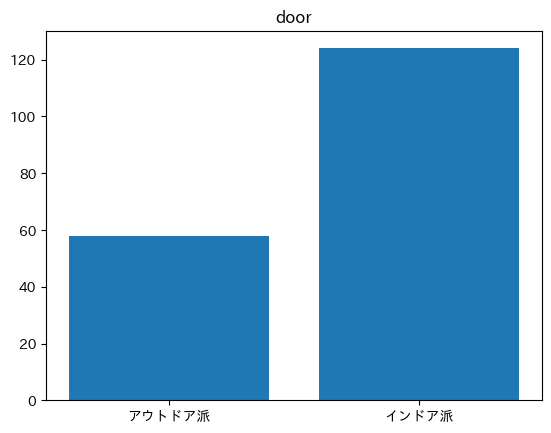

In [95]:
## ここから
content = "door"
## ここまでの文字列を変更してください！

df_graph = df_3.copy()
labels = np.array(questions_org[content]["choices"])
amounts = []
for label in labels:
  data = len(df_graph[df_graph[content]==label])
  amounts.append(data)
amounts = np.array(amounts)
print(amounts)
plt.bar(labels, amounts)
plt.title(content)

#2-2. 絞り込んだ後の棒グラフ化

対象を絞り込んだ後，棒グラフで可視化することもできます．

[ 4 16]


Text(0.5, 1.0, 'busが新宮方面のdoor')

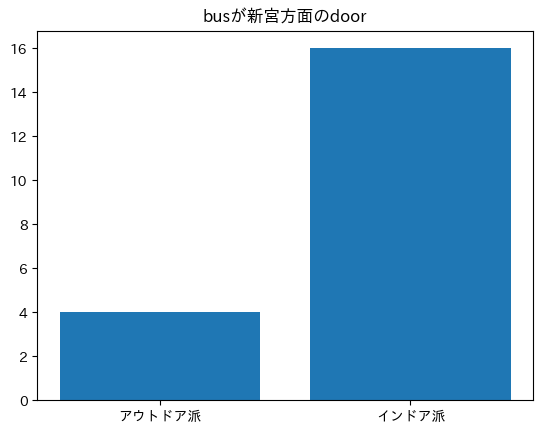

In [94]:
## ここから
choice = "bus"
ans = "新宮方面"

content = "door"
## ここまでの文字列を変更してください！

df_graph = df_3.copy()
df_graph = df_graph[df_graph[choice] == ans]
labels = np.array(questions_org[content]["choices"])
amounts = []
for label in labels:
  data = len(df_graph[df_graph[content]==label])
  amounts.append(data)
amounts = np.array(amounts)
print(amounts)
plt.bar(labels, amounts)
plt.title(f"{choice}が{ans}の{content}")

##2-3. クロス集計
二つの質問の回答の関係性を表します．

In [21]:
##ここから
content_1 = "subject"
content_2 = "science"
## ここまでの文字列を変更してください！


labels_1 = np.array(questions_org[content_1]["choices"])
labels_2 =  np.array(questions_org[content_2]["choices"])

table = []
for label1 in labels_1:
  row = []
  for label2 in labels_2:
    target = df[(df[content_1] == label1) & (df[content_2] == label2)]
    row.append(len(target))
  table.append(row)
table = np.array(table)

df_cross = pd.DataFrame(table,
                  columns=labels_2,
                  index=labels_1)
print(" "*10+content_2)
display(df_cross)

          science


,はい,いいえ
国語,7,5
数学,44,19
理科,38,6
社会,21,10
英語,20,12


これで，科学が好きな生徒が，理系科目が好きな割合が高いことが分かると思います．

この先にも分析追加してます！！

#3. 実践コード
中身については，また来週実装しながら説明したいと思います．

In [22]:
# 初期化
important_org = {
    "essential":["student_num", "club", "birthday", "living"],
    "important":["grade", "class", "subject", "bus", "season", "3tennkai", "learning"],
    "normal":["sex","door","fishmeet", "blood","kinotake", "ricebread", "income","committee",
              "heyfever", "grasses", "science", "apple", "asmr", "food"]
}
question_data = questions_org.copy()
df = df_3.copy()
questions_dic = important_org.copy()
yes_no = {0: "はい", 1 : 'いいえ'}
# 質問の回数を保存
N = 0

while True:
    # 生徒数が1以下なら終わり
    if len(df) < 1:
        print("対象者が見つかりませんでした")
        break
    elif len(df) == 1:
        print("対象者が見つかりました")
        print(df["name"].to_list()[0])
        break

    # 質問内容を選ぶ-----------------------------ここは 1-1 でやりました

    # 質問の重要性を考える
    if len(df) > 90:
      importance = "normal"
    elif len(df) > 6:
      importance = "important"
    else:
      importance = "essential"

    #--------------------------------------------

    # 重要性別のリストが空なら多い normal から選ぶ
    if len(questions_dic[importance]) < 1:
      importance = "normal"

    # 質問の選択
    content = random.choice(questions_dic[importance])

    questions_dic[importance].remove(content) # 削除
    statement = question_data[content]["statement"] # 質問文

    # 質問の選択肢
    choices = list(set(df[content]))

    # 選択肢が1つの場合飛ばす
    if len(choices) < 2:
      continue

    # 答える
    q_target = random.choice(choices) # 回答対象

    ans = random.randint(0, 1) # はい / いいえ　を今だけランダムで選びます

    # print文出力
    N += 1
    print(f"\n第{N}問")
    print("質問 : ", statement.format(q_target))
    print("答え : ", yes_no[ans])

    # 解答によって絞り込みを行う
    if ans == 0: # Yes
        df = df[df[content] == q_target]
    else: # No
        df = df[df[content] != q_target]

display(df)


第1問
質問 :  ASMRは好きですか？
答え :  はい

第2問
質問 :  好きな季節は秋ですか？
答え :  いいえ

第3問
質問 :  1年生ですか？
答え :  はい

第4問
質問 :  運動と勉強だと運動の方が好きですか？
答え :  はい

第5問
質問 :  その他ですか？
答え :  いいえ

第6問
質問 :  12月生まれですか？
答え :  いいえ

第7問
質問 :  出席番号は9番ですか？
答え :  はい
対象者が見つかりました
北郷成菜


,name,grade,class,attendance_num,sex,club,subject,door,bus,fishmeet,...,income,committee,3tennkai,heyfever,grasses,science,apple,learning,asmr,food
7,北郷成菜,1年,1組,9,女,バスケットボール部,理科,インドア派,新宮方面,魚派,...,はい,いいえ,A,はい,いいえ,はい,はい,運動,はい,いいえ


In [62]:
def akinator():
  # 初期化
  important_org = {
      "essential":["student_num", "club", "birthday", "living"],
      "important":["grade", "class", "subject", "bus", "season", "3tennkai", "learning"],
      "normal":["sex","door","fishmeet", "blood","kinotake", "ricebread", "income","committee",
                "heyfever", "grasses", "science", "apple", "asmr", "food"]
  }
  question_data = questions_org.copy()
  df = df_3.copy()
  questions_dic = important_org.copy()
  yes_no = {0: "はい", 1 : 'いいえ'}
  # 質問の回数を保存
  N = 0

  while True:
      # 生徒数が1以下なら終わり
      if len(df) < 1:
          # print("対象者が見つかりませんでした")
          break
      elif len(df) == 1:
          # print("対象者が見つかりました")
          # print(df["name"].to_list()[0])
          break

      # 質問内容を選ぶ-----------------------------ここは 1-1 でやりました

      # 質問の重要性を考える
      if len(df) > 90:
        importance = "normal"
      elif len(df) > 6:
        importance = "important"
      else:
        importance = "essential"

      #--------------------------------------------

      # 重要性別のリストが空なら多い normal から選ぶ
      if len(questions_dic[importance]) < 1:
        importance = "normal"

      # 質問の選択
      content = random.choice(questions_dic[importance])

      questions_dic[importance].remove(content) # 削除

      statement = question_data[content]["statement"] # 質問文

      # 質問の選択肢
      choices = list(set(df[content]))

      # 選択肢が1つの場合飛ばす
      if len(choices) < 2:
        continue

      # 答える
      q_target = random.choice(choices) # 回答対象

      ans = random.randint(0, 1) # はい / いいえ　を今だけランダムで選びます

      # print文出力
      N += 1
      # print(f"\n第{N}問")
      # print("質問 : ", statement.format(q_target))
      # print("答え : ", yes_no[ans])

      # 解答によって絞り込みを行う
      if ans == 0: # Yes
          df = df[df[content] == q_target]
      else: # No
          df = df[df[content] != q_target]

  # display(df)
  return N, df

## 分析 3-1　答えが出るまでの回数の平均を求める

In [75]:
N = 500
# ここで何回繰り返しするかを変更する

questions_count = 0
count = 0
for _ in range(N):
  n, student = akinator()
  questions_count += n
  count += 1
average = questions_count / count

print(f"{N} 回繰り返したとき，答えが出るまでの回数の平均は")
print(average)

500 回繰り返したとき，答えが出るまでの回数の平均は
6.154


## 分析 3-2 絞り込んで答えが出るまでの回数の平均を求める

In [74]:
N = 500
choice = "bus"
ans = "新宮方面"


questions_count = 0
count = 0
for _ in range(N):
  n, student = akinator()
  if student[choice].to_list()[0] == ans:
    # display(student)
    questions_count += n
    count += 1
average = questions_count / count

print(f"{N} 回繰り返したとき，　'{choice}'　が　'{ans}'　な人が出るまでの回数の平均は")
print(average)

500 回繰り返したとき，　'bus'　が　'新宮方面'　な人が出るまでの回数の平均は
5.892307692307693
